In [24]:
#Importing Labraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#load dataset
df=pd.read_csv("C:\\Users\\MANSI\\Downloads\\brent-daily.csv")
df = df.set_index('Date')
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2023-01-17,84.38
2023-01-18,83.78
2023-01-19,85.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9056 entries, 1987-05-20 to 2023-01-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9056 non-null   float64
dtypes: float64(1)
memory usage: 141.5+ KB


# EDA

In [4]:
df.index=pd.to_datetime(df.index)

In [5]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df1 = create_features(df)

In [6]:
df1

,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
1987-05-20,18.63,2,2,5,1987,140,20,21
1987-05-21,18.45,3,2,5,1987,141,21,21
1987-05-22,18.55,4,2,5,1987,142,22,21
1987-05-25,18.60,0,2,5,1987,145,25,22
1987-05-26,18.63,1,2,5,1987,146,26,22
...,...,...,...,...,...,...,...,...
2023-01-17,84.38,1,1,1,2023,17,17,3
2023-01-18,83.78,2,1,1,2023,18,18,3
2023-01-19,85.08,3,1,1,2023,19,19,3


In [7]:
df1.year.unique()

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023], dtype=int64)

In [8]:
df1.dtypes

Price         float64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
weekofyear     UInt32
dtype: object

In [9]:
df1.shape

(9056, 8)

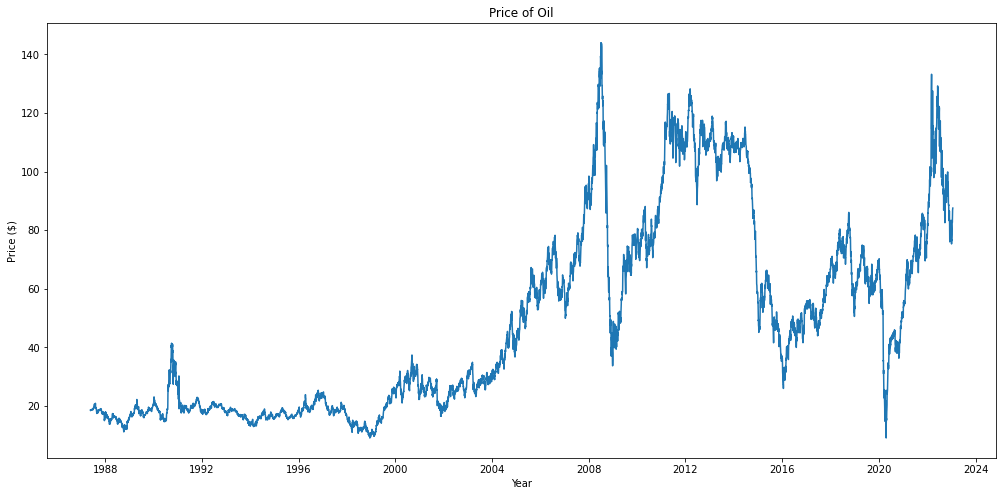

In [10]:
plt.figure(figsize=(17, 8))
plt.plot(df1.Price)
plt.title('Price of Oil')
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

<AxesSubplot:xlabel='month', ylabel='year'>

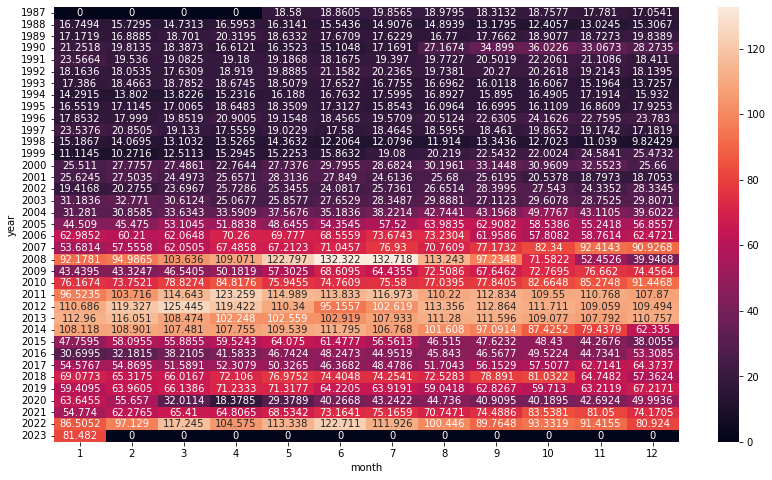

In [11]:
plt.figure(figsize=(14,8))
heatmap_month = pd.pivot_table(data=df1,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_month,annot=True,fmt="g") 

<AxesSubplot:xlabel='year', ylabel='Price'>

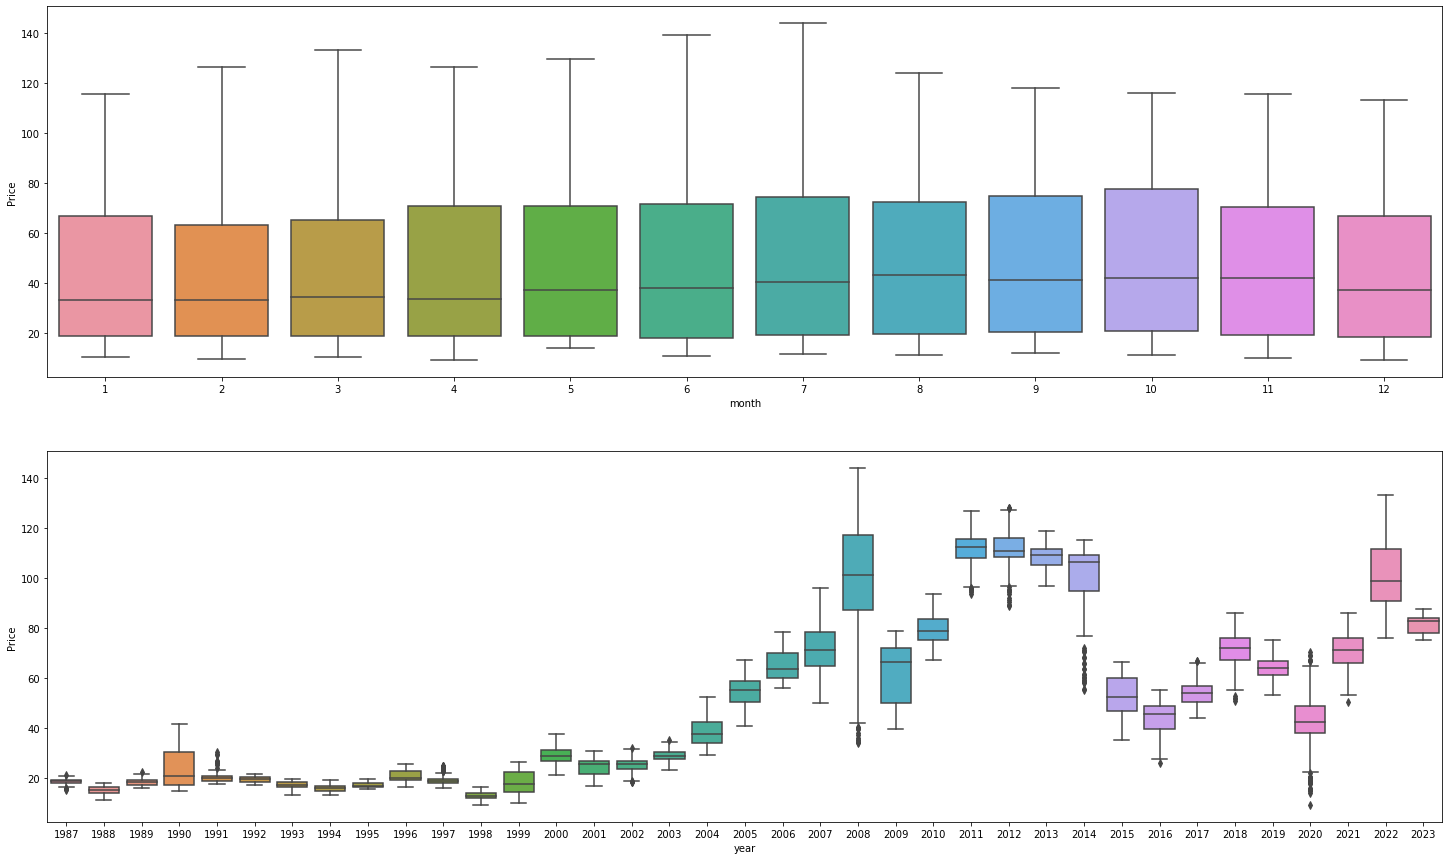

In [12]:
# Boxplot for ever
plt.figure(figsize=(25,15))
plt.subplot(211)
sns.boxplot(x="month",y="Price",data=df1)
plt.subplot(212)
sns.boxplot(x="year",y="Price",data=df1)

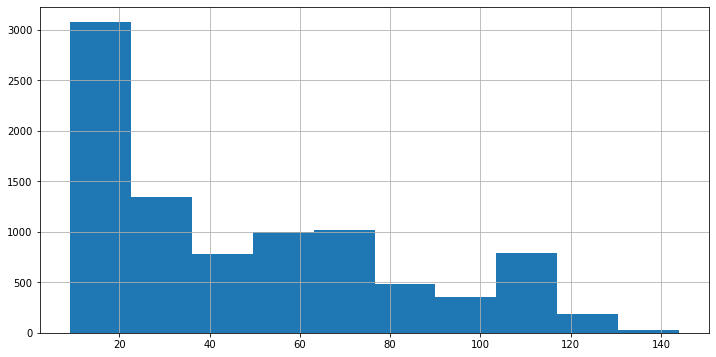

In [13]:
df1.Price.hist(figsize=(12,6))
plt.show()

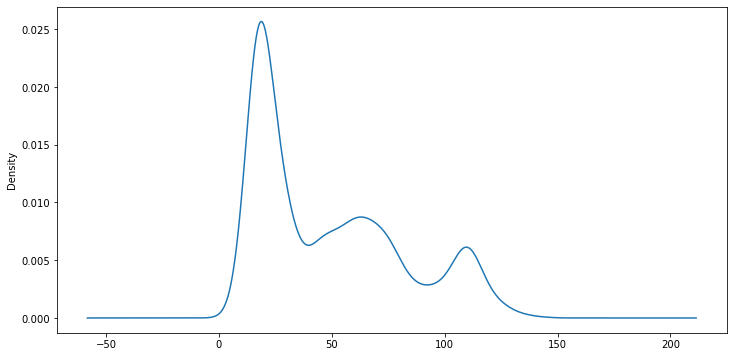

In [14]:
# create a density plot
df1.Price.plot(kind='kde', figsize=(12,6))
plt.show()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Price'], model='multiplicable', period=12)

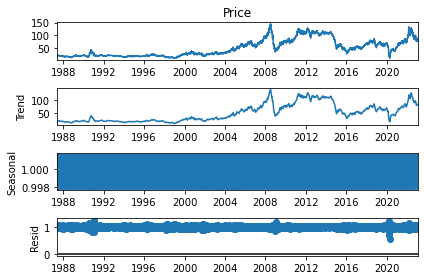

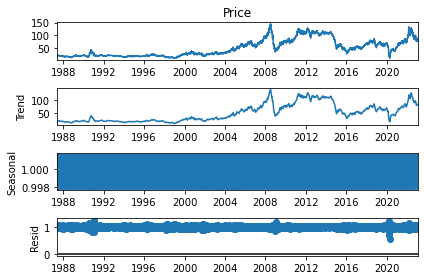

In [16]:
result.plot()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

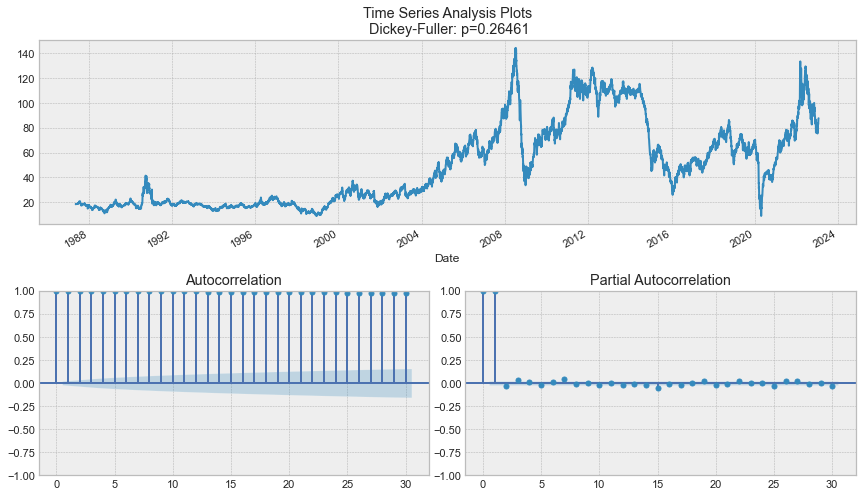

In [18]:
#Stationarity

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df.Price, lags=30)

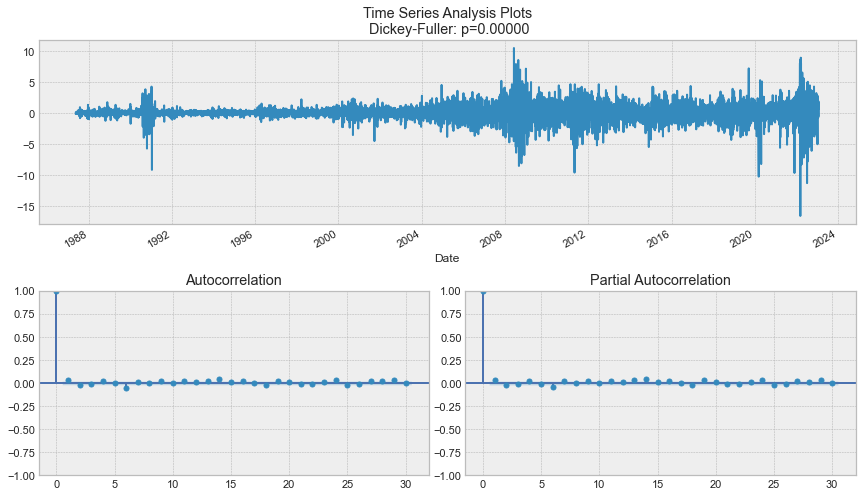

In [19]:
df_diff = df.Price - df.Price.shift(1)

tsplot(df_diff[1:], lags=30)

In [20]:
df_diff

Date
1987-05-20     NaN
1987-05-21   -0.18
1987-05-22    0.10
1987-05-25    0.05
1987-05-26    0.03
              ... 
2023-01-17    1.73
2023-01-18   -0.60
2023-01-19    1.30
2023-01-20    1.88
2023-01-23    0.58
Name: Price, Length: 9056, dtype: float64

In [21]:
df2=df_diff.dropna()
df2

Date
1987-05-21   -0.18
1987-05-22    0.10
1987-05-25    0.05
1987-05-26    0.03
1987-05-27   -0.03
              ... 
2023-01-17    1.73
2023-01-18   -0.60
2023-01-19    1.30
2023-01-20    1.88
2023-01-23    0.58
Name: Price, Length: 9055, dtype: float64

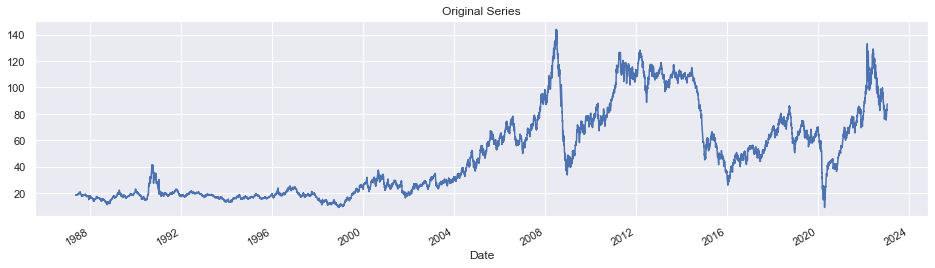

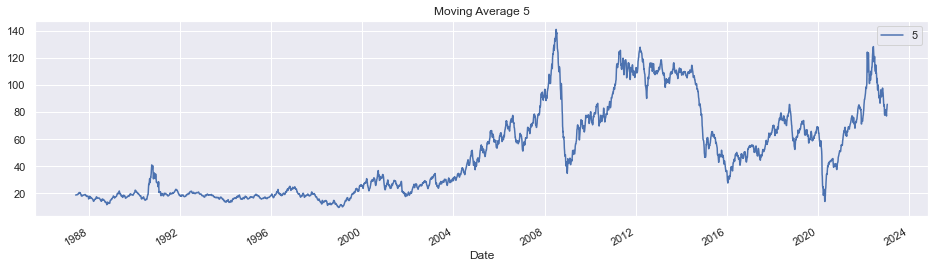

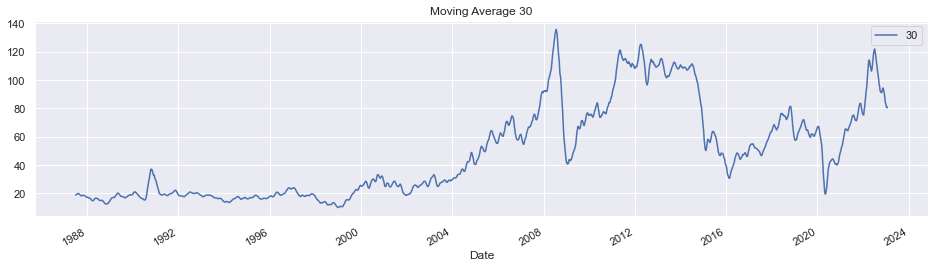

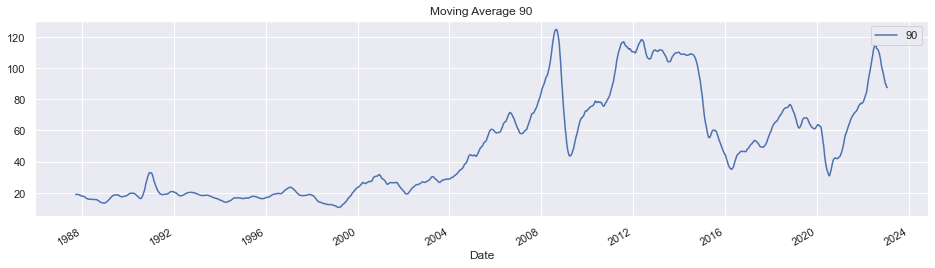

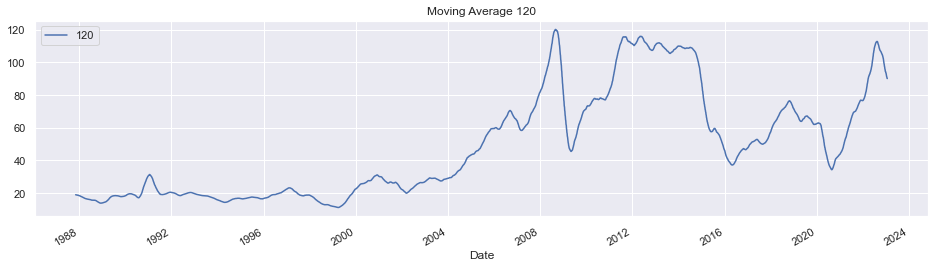

In [22]:
#Moving Average
plt.figure(figsize=(16,4))
df.Price.plot(label="org")
plt.title("Original Series")
for i in (5,30,90,120):
    plt.figure(figsize=(16,4))
    df["Price"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# Model Building

In [27]:
#Train Test Split
train_data = df[:8000]
test_data = df[8000:]

In [28]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1987-05-20 00:00:00 2018-11-21 00:00:00 
 Test: 2018-11-22 00:00:00 2023-01-23 00:00:00


In [29]:
train_data

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2018-11-15,65.61
2018-11-16,65.29
2018-11-19,64.14


In [30]:
test_data

,Price
Date,
2018-11-22,61.11
2018-11-23,57.69
2018-11-26,59.70
2018-11-27,59.58
2018-11-28,57.97
...,...
2023-01-17,84.38
2023-01-18,83.78
2023-01-19,85.08


# Evaluation Metric MAPE

In [31]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
single_exp = SimpleExpSmoothing(train_data).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(1056)

<AxesSubplot:xlabel='Date'>

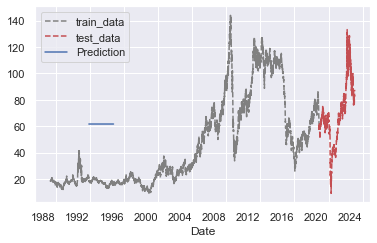

In [33]:
train_data['Price'].plot(style='--', color='gray', legend=True, label='train_data')
test_data['Price'].plot(style='--', color='r', legend=True, label='test_data')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [34]:
print('Train RMSE:',mean_squared_error(train_data, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_data, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_data, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_data, single_exp_test_pred))

Train RMSE: 1.0639955597375979
Test RMSE: 24.246100708377277
Train MAPE: 1987-05-20 00:00:00   NaN
1987-05-21 00:00:00   NaN
1987-05-22 00:00:00   NaN
1987-05-25 00:00:00   NaN
1987-05-26 00:00:00   NaN
                       ..
2018-11-16 00:00:00   NaN
2018-11-19 00:00:00   NaN
2018-11-20 00:00:00   NaN
2018-11-21 00:00:00   NaN
Price                 NaN
Length: 8001, dtype: float64
Test MAPE: 8000    NaN
8001    NaN
8002    NaN
8003    NaN
8004    NaN
         ..
9052    NaN
9053    NaN
9054    NaN
9055    NaN
Price   NaN
Length: 1057, dtype: float64


In [35]:
double_exp = ExponentialSmoothing(train_data, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(1056)

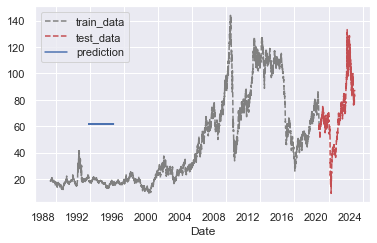

In [36]:
train_data['Price'].plot(style='--', color='gray', legend=True, label='train_data')
test_data['Price'].plot(style='--', color='r', legend=True, label='test_data')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [37]:
print('Train RMSE:',mean_squared_error(train_data, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_data, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_data, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_data, double_exp_test_pred))

Train RMSE: 1.0624210120548196
Test RMSE: 24.23766807265472
Train MAPE: 1987-05-20 00:00:00   NaN
1987-05-21 00:00:00   NaN
1987-05-22 00:00:00   NaN
1987-05-25 00:00:00   NaN
1987-05-26 00:00:00   NaN
                       ..
2018-11-16 00:00:00   NaN
2018-11-19 00:00:00   NaN
2018-11-20 00:00:00   NaN
2018-11-21 00:00:00   NaN
Price                 NaN
Length: 8001, dtype: float64
Test MAPE: 8000    NaN
8001    NaN
8002    NaN
8003    NaN
8004    NaN
         ..
9052    NaN
9053    NaN
9054    NaN
9055    NaN
Price   NaN
Length: 1057, dtype: float64


In [38]:
hw_model = ExponentialSmoothing(train_data['Price'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add", 
                          seasonal_periods=28, 
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(1056)

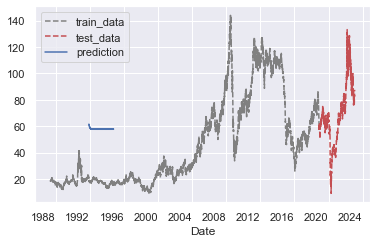

In [39]:
train_data['Price'].plot(style='--', color='gray', legend=True, label='train_data')
test_data['Price'].plot(style='--', color='r', legend=True, label='test_data')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
#LSTM  MODEL

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

In [28]:


# Split the data into training and testing sets
train_data =  df.loc[:'2018-01-01']
test_data = df.loc['2018-01-01':]

# Scale the data using StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of past time steps to use for prediction
seq_len = 30

# Create the input sequences and corresponding outputs
def create_sequences(data, seq_len):
    X = []
    y = []
    num_sequences = len(data) - seq_len
    for i in range(num_sequences):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled, seq_len)
X_test, y_test = create_sequences(test_data_scaled, seq_len)

# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Evaluate the model on the test data
mse = model.evaluate(X_test, y_test)
print('Mean squared error on test data:', mse)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Rescale the data back to the original range
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Convert the numpy arrays to pandas dataframes
y_test_df = pd.DataFrame(y_test_rescaled, index=test_data.index[seq_len:])
y_pred_df = pd.DataFrame(y_pred_rescaled, index=test_data.index[seq_len:])

# Print the actual and predicted values for the test set
print('Actual:\n', y_test_df)
print('Predicted:\n', y_pred_df)

Epoch 1/200
242/242 [==============================] - 16s 40ms/step - loss: 0.0162
Epoch 2/200
242/242 [==============================] - 9s 39ms/step - loss: 0.0038
Epoch 3/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0030
Epoch 4/200
242/242 [==============================] - 9s 39ms/step - loss: 0.0025
Epoch 5/200
242/242 [==============================] - 9s 39ms/step - loss: 0.0022
Epoch 6/200
242/242 [==============================] - 9s 38ms/step - loss: 0.0017
Epoch 7/200
242/242 [==============================] - 9s 39ms/step - loss: 0.0015
Epoch 8/200
242/242 [==============================] - 10s 39ms/step - loss: 0.0014
Epoch 9/200
242/242 [==============================] - 10s 39ms/step - loss: 0.0015
Epoch 10/200
242/242 [==============================] - 10s 39ms/step - loss: 0.0013
Epoch 11/200
242/242 [==============================] - 10s 39ms/step - loss: 0.0014
Epoch 12/200
242/242 [==============================] - 10s 40ms/step - loss: 0

242/242 [==============================] - 9s 38ms/step - loss: 0.0010
Epoch 193/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 194/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 195/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 196/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 197/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 198/200
242/242 [==============================] - 10s 40ms/step - loss: 0.0011
Epoch 199/200
242/242 [==============================] - 9s 38ms/step - loss: 0.0011
Epoch 200/200
40/40 [==============================] - 4s 13ms/step - loss: 0.0036
Mean squared error on test data: 0.0036114719696342945
40/40 [==============================] - 2s 16ms/step
Actual:
                 0
Date             
2018-02-13  61.94
2018-02-14  62.29
2018-02-15  62.86
2018-02-16  64.30
2018-02-19  64.95
.

In [29]:
# Define the number of future time steps to forecast
forecast_horizon = 30

# Scale the most recent data using StandardScaler
latest_data = df.tail(seq_len).values.reshape(-1, 1)
latest_data_scaled = scaler.transform(latest_data)

# Create a list to store the forecasted values
forecast = []

# Loop through the forecast horizon and make predictions
for i in range(forecast_horizon):
    # Reshape the data into the expected input shape for the model
    X = latest_data_scaled.reshape(1, seq_len, 1)
    
    # Make a prediction using the model
    y_pred = model.predict(X)
    
    # Rescale the predicted value back to the original range
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    
    # Append the forecasted value to the list
    forecast.append(y_pred_rescaled[0][0])
    
    # Update the latest data with the new forecasted value
    latest_data = np.append(latest_data[1:], y_pred_rescaled)
    latest_data_scaled = scaler.transform(latest_data.reshape(-1, 1))
    
# Create a pandas dataframe to store the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_horizon+1, freq='D')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['forecast'])

# Print the forecasted values
print(forecast_df)



1/1 [==============================] - 0s 48ms/step
             forecast
2023-01-24  87.787125
2023-01-25  87.933601
2023-01-26  88.084709
2023-01-27  88.285103
2023-01-28  88.512817
2023-01-29  88.750824
2023-01-30  88.993629
2023-01-31  89.244148
2023-02-01  89.502220
2023-02-02  89.770142
2023-02-03  90.048706
2023-02-04  90.341011
2023-02-05  90.646111
2023-02-06  90.961182
2023-02-07  91.288109
2023-02-08  91.626274
2023-02-09  91.968605
2023-02-10  92.309631
2023-02-11  92.648506
2023-02-12  92.983177
2023-02-13  93.312309
2023-02-14  93.637207
2023-02-15  93.962479
2023-02-16  94.289665
2023-02-17  94.619766
2023-02-18  94.953972
2023-02-19  95.291573
2023-02-20  95.631195
2023-02-21  95.975876
2023-02-22  96.328484
